# Application of Python-based geospatial visualisation tool (e.g., GeoPandas) on a real- world dataset

This project analyze and visualize the urban population growth of the world for the years 2001 and 2021 using Python-based tools, with a focus on creating choropleth maps. The dataset for this analysis is sourced from the World Bank and is accessible here or my GitHub repository.

The goal is to develop a clear and reproducible solution, where all steps, from data importation to visualization, will be documented in a structured and lucid manner. The project leverages Python libraries such as GeoPandas for geospatial operations, pandas for data manipulation and Matplotlib and Plotly for plotting. The primary focus is on ensuring the dataset is cleaned and prepared effectively for visualization, enabling the creation of accurate and meaningful choropleth maps.

Through this approach, I intend to highlight the global trends and regional differences in urban population changes over the two decades, providing insights into demographic and developmental shifts. I have made effort to design and execute the codes without errors, ensuring the reproducibility of results and clarity in explaining the coding steps.

In [ ]:
# Import Nessesary Libraries
import pandas as pd
import geopandas as gpd
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the Colab directory
%cd '/content/drive/My Drive/Colab'



Mounted at /content/drive
/content/drive/My Drive/Colab




<div class="alert alert-block alert-info">
    
    
 <span style='font-family:Georgia'> The first four rows of the Urban Population Dataset contains header information, such as titles, descriptions and metadata, which are not part of the actual data. It was important to skip these four rows to avoid ParserError. Skipping these rows ensures that we start reading the data from the correct row containing the column headers or the actual data values.

</div>

In [ ]:
# Load and read Urban Population Dataset, skipping the first 4 rows
urban_population_data = pd.read_csv('API_SP.URB.TOTL_DS2_en_csv_v2_12209.csv', skiprows=4)

# Display the first few rows of the dataset
urban_population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population,SP.URB.TOTL,27728.0,28330.0,28764.0,29157.0,29505.0,29802.0,...,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0,NaN
1,Africa Eastern and Southern,AFE,Urban population,SP.URB.TOTL,19033821.0,19872354.0,20770791.0,21737424.0,22773061.0,23870852.0,...,198073453.0,206556403.0,215083441.0,223732229.0,232922327.0,242451140.0,252315481.0,262377061.0,272666107.0,NaN
2,Afghanistan,AFG,Urban population,SP.URB.TOTL,724373.0,763336.0,805062.0,849446.0,896820.0,947332.0,...,8043935.0,8371880.0,8665979.0,8999963.0,9353296.0,9727157.0,10142913.0,10551772.0,10946834.0,NaN
3,Africa Western and Central,AFW,Urban population,SP.URB.TOTL,14301917.0,14986610.0,15707826.0,16480638.0,17302426.0,18177351.0,...,175773257.0,183117253.0,190684610.0,198494008.0,206492202.0,214684207.0,223107995.0,231704052.0,240494466.0,NaN
4,Angola,AGO,Urban population,SP.URB.TOTL,559023.0,587555.0,618618.0,650924.0,684074.0,717302.0,...,17017877.0,17845914.0,18702478.0,19586972.0,20488542.0,21410634.0,22338586.0,23276246.0,24229338.0,NaN


# Lets do some data cleaning and preprocessing

In [ ]:
# Check data types of each column
print("\nData types of each column:")
print(urban_population_data.dtypes)


Data types of each column:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
Unnamed: 67       float64
Length: 68, dtype: object


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> From the above output, most of the columns contain numeric values, with the exception of the first four columns (Country Name, Country Code, Indicator Name, Indicator Code), which contain object (string) data types. This is as expected and its good for further analysis.

However, there is an unnamed column (Unnamed: 67) at the end of the DataFrame, which contain NaN values. Since this column do not necessarily serve any purpose to our analysis, we will remove it completely.

</div>

In [ ]:
# Drop the unnamed column
urban_population_data.drop(columns=['Unnamed: 67'], inplace=True)

# Display the updated DataFrame after dropping the unnamed column
urban_population_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population,SP.URB.TOTL,27728.0,28330.0,28764.0,29157.0,29505.0,29802.0,...,44228.0,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0
1,Africa Eastern and Southern,AFE,Urban population,SP.URB.TOTL,19033821.0,19872354.0,20770791.0,21737424.0,22773061.0,23870852.0,...,190108778.0,198073453.0,206556403.0,215083441.0,223732229.0,232922327.0,242451140.0,252315481.0,262377061.0,272666107.0
2,Afghanistan,AFG,Urban population,SP.URB.TOTL,724373.0,763336.0,805062.0,849446.0,896820.0,947332.0,...,7687539.0,8043935.0,8371880.0,8665979.0,8999963.0,9353296.0,9727157.0,10142913.0,10551772.0,10946834.0
3,Africa Western and Central,AFW,Urban population,SP.URB.TOTL,14301917.0,14986610.0,15707826.0,16480638.0,17302426.0,18177351.0,...,168643432.0,175773257.0,183117253.0,190684610.0,198494008.0,206492202.0,214684207.0,223107995.0,231704052.0,240494466.0
4,Angola,AGO,Urban population,SP.URB.TOTL,559023.0,587555.0,618618.0,650924.0,684074.0,717302.0,...,16211664.0,17017877.0,17845914.0,18702478.0,19586972.0,20488542.0,21410634.0,22338586.0,23276246.0,24229338.0


In [ ]:
# Check for duplicate rows
duplicate_rows = urban_population_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame urban_population_data:", urban_population_data.shape)

Shape of the DataFrame urban_population_data: (266, 67)


In [ ]:
# Check for missing values
missing_values = urban_population_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2018              3
2019              3
2020              3
2021              3
2022              3
Length: 67, dtype: int64


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> There are missing values in some of the columns of urban_population_data. However, the number of missing values is relatively small compared to the size of the dataset, so removing those missing values would not significantly impact the analysis.

**Note** - I will remame the 'urban_population_data' to 'urban_population_data_cleaned' to represent the new DataFrame after removing the rows with missing values. This is to indicate that the DataFrame has undergone a cleaning process.

</div>

In [ ]:
# Drop rows with missing values
urban_population_data_cleaned = urban_population_data.dropna()

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame after dropping missing values:", urban_population_data_cleaned.shape)


Shape of the cleaned DataFrame after dropping missing values: (262, 67)


In [ ]:
# Verify that missing value have been handled
missing_values = urban_population_data_cleaned.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64


In [ ]:
# Display the cleaned DataFrame
urban_population_data_cleaned.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population,SP.URB.TOTL,27728.0,28330.0,28764.0,29157.0,29505.0,29802.0,...,44228.0,44588.0,44943.0,45297.0,45648.0,45999.0,46351.0,46574.0,46734.0,46891.0
1,Africa Eastern and Southern,AFE,Urban population,SP.URB.TOTL,19033821.0,19872354.0,20770791.0,21737424.0,22773061.0,23870852.0,...,190108778.0,198073453.0,206556403.0,215083441.0,223732229.0,232922327.0,242451140.0,252315481.0,262377061.0,272666107.0
2,Afghanistan,AFG,Urban population,SP.URB.TOTL,724373.0,763336.0,805062.0,849446.0,896820.0,947332.0,...,7687539.0,8043935.0,8371880.0,8665979.0,8999963.0,9353296.0,9727157.0,10142913.0,10551772.0,10946834.0
3,Africa Western and Central,AFW,Urban population,SP.URB.TOTL,14301917.0,14986610.0,15707826.0,16480638.0,17302426.0,18177351.0,...,168643432.0,175773257.0,183117253.0,190684610.0,198494008.0,206492202.0,214684207.0,223107995.0,231704052.0,240494466.0
4,Angola,AGO,Urban population,SP.URB.TOTL,559023.0,587555.0,618618.0,650924.0,684074.0,717302.0,...,16211664.0,17017877.0,17845914.0,18702478.0,19586972.0,20488542.0,21410634.0,22338586.0,23276246.0,24229338.0


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> There are no more missing values in our dataset. Missing value has been handled, reducing our dataset from (266, 67) to (262, 67).
     
We have now successfully cleaned the World Population Dataset and we have save it in a DataFrame called 'urban_population_data_cleaned'.     

</div>

# Geospatial Operations

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Performing geospatial operations is essential for integrating geographic context (longitude and latitudes) as in shapefile, into data analysis and visualisation. This will help us relate data to geographic features such as points, lines and polygons.
     
Here we will use the in-built geopanda DataFrame (gpd) named as 'naturalearth_lowres' dataset which is the low-resolution version of the Natural Earth dataset. It contains simplified geometries suitable for visualisation at smaller scales.
     
The Coordinate Reference System (CRS) of the 'naturalearth_lowres' dataset is commonly set to the World Geodetic System 1984 (WGS84), which is represented by the EPSG code 4326.

</div>

In [ ]:
# Load the Natural Earth low-resolution dataset - shapefile
shapefile_path = '/content/drive/MyDrive/shapefiless/ne_110m_admin_0_countries.shp'

# Load the Natural Earth low-resolution dataset - shapefile
gdf = gpd.read_file(shapefile_path)

# Get the CRS of the dataset
crs = gdf.crs
print("CRS of the 'naturalearth_lowres' dataset:", crs)

# Display the first few rows of the dataset
(gdf.head())


CRS of the 'naturalearth_lowres' dataset: EPSG:4326


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [ ]:
# Select only the 'SOV_A3', 'SOVEREIGNT' and 'geometry' columns as a subset(since those are the columns we are interested in)
gdf_subset = gdf[['SOV_A3', 'SOVEREIGNT', 'geometry']]

# Display the first few rows of the subsetted dataset
(gdf_subset.head())

,SOV_A3,SOVEREIGNT,geometry
0,FJI,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,TZA,United Republic of Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,SAH,Western Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,US1,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [ ]:
# Rename the 'SOV_A3' column to 'Country Code' and 'SOVEREIGNT' column to 'Country' (This is to give clarity and readability)
gdf_subset = gdf_subset.rename(columns={'SOV_A3': 'Country Code'})
gdf_subset = gdf_subset.rename(columns={'SOVEREIGNT': 'Country'})


# Display the first few rows of the subset dataset with the renamed column
(gdf_subset.head())


,Country Code,Country,geometry
0,FJI,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,TZA,United Republic of Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,SAH,Western Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,US1,United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> **Note** - For context, we will merge our previous urban_population_data_cleaned with the geospatial dataset inorder to connect the geometry with the Urban population dataset.

</div>

In [ ]:
# Merge the datasets on the 'Country Code' column
merged_data = gdf_subset.merge(urban_population_data_cleaned, on='Country Code', how='inner')

# Display the merged dataset
(merged_data.head())


,Country Code,Country,geometry,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,FJI,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,Urban population,SP.URB.TOTL,119270.0,125388.0,131828.0,138608.0,...,490579.0,496380.0,501947.0,507262.0,512280.0,516917.0,521229.0,526914.0,533870.0,541393.0
1,TZA,United Republic of Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Tanzania,Urban population,SP.URB.TOTL,526827.0,557626.0,590457.0,625168.0,...,14872630.0,15703729.0,16612464.0,17589735.0,18597942.0,19620628.0,20656040.0,21736651.0,22862550.0,24025884.0
2,CAN,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,Urban population,SP.URB.TOTL,12368380.0,12729040.0,13121753.0,13522659.0,...,28479640.0,28781576.0,29011826.0,29357013.0,29729549.0,30175056.0,30638234.0,30999405.0,31213082.0,31825973.0
3,KAZ,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,Urban population,SP.URB.TOTL,4118937.0,4313202.0,4511216.0,4712058.0,...,9718100.0,9874723.0,10032906.0,10189588.0,10342139.0,10495801.0,10652767.0,10816580.0,10986561.0,11378782.0
4,UZB,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,Urban population,SP.URB.TOTL,2844744.0,2975983.0,3118187.0,3265747.0,...,15408910.0,15640290.0,15884192.0,16130961.0,16372437.0,16635580.0,16935578.0,17258430.0,17606637.0,17990170.0


In [ ]:
type(merged_data)

geopandas.geodataframe.GeoDataFrame

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>  <strong> We now have a geodata after the merge. Now let's plot a set of choropleth maps representing the urban population of the world for the years 2001 and 2021 respectively, which is the main task. <strong/>

</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> To enhance the visual representation of urban population data for the years 2001 and 2021, I decided to customise the choropleth maps using the Python's Plotly library. The default settings of the maps lacked clarity in presenting both the urban population and the corresponding countries. By customising the maps, I aimed to provide a clearer and more informative visualisation.

Using the Plotly library allowed me to implement specific customisations to achieve this goal. I focused on ensuring that both the urban population values and the country names were prominently displayed and easily accessible to the viewer. To accomplish this, I made adjustments to the hover functionality of the maps. Specifically, I customised the hover feature to display the country names alongside the urban population values for the respective years (2001 and 2021).

By incorporating these customisations, the choropleth maps now offer a more intuitive and informative experience for visualising urban population data, allowing easy interpretation and analysis of the presented information.

</div>

In [ ]:
import plotly.express as px

# Create choropleth map of Urban Population 2001
fig = px.choropleth(merged_data,
                    locations="Country Name",
                    locationmode="country names",
                    color="2001",
                    hover_name="Country Name",
                    color_continuous_scale=px.colors.sequential.OrRd,
                    labels={'2001': 'Urban Population 2001'}
                   )

# Define map layout
fig.update_layout(title_text="Choropleth Map of Urban Population 2001",
                  geo=dict(showcoastlines=True,
                           projection_type='equirectangular'))

# Show the map
fig.show()

# You can simply hover around different part of the map to see more details



In [ ]:
import plotly.express as px

# Create choropleth map of Urban Population 2021
fig = px.choropleth(merged_data,
                    locations="Country Name",
                    locationmode="country names",
                    color="2021",
                    hover_name="Country Name",
                    color_continuous_scale=px.colors.sequential.OrRd,
                    labels={'2021': 'Urban Population 2021'}
                   )

# Define map layout
fig.update_layout(title_text="Choropleth Map of Urban Population 2021",
                  geo=dict(showcoastlines=True,
                           projection_type='equirectangular'))

# Show the map
fig.show()

# You can simply hover around different part of the map to see more details


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> The choropleth map visually represents the distribution of urban population across geographical regions for the years 2001 and 2021. In both maps, darker shades indicate higher urban population sizes, while lighter shades correspond to lower urban population sizes. As the colors get darker, it signifies an increase in urban population density within the respective regions over the two decades. This visualisation allows us to observe spatial patterns of urbanisation and identify areas experiencing significant population growth over the time period

</div>

# TASK 1.2 - Analysis of geospatial datasets


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> This task requires us to merge or combine World Population Dataset with Urban Population Dataset. To achieve this, we will begin by cleaning World Population Dataset as we did for Urban Population Dataset in the previous task.
     
Python libraries - pandas and geopandas are required for this task. However, since I've already imported them in earlier steps, there's no need to duplicate that effort here to prevent redundancy. This approach helps to maintain code efficiency and clarity.   

</div>

In [ ]:
# Load World Population Dataset, skipping the first 4 rows
world_population_data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_79.csv', skiprows=4)

# Display the first few rows of the dataset
world_population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [ ]:
# Check data types of each column
print("\nData types of each column:")
print(world_population_data.dtypes)


Data types of each column:
Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
Unnamed: 67       float64
Length: 68, dtype: object


In [ ]:
# Drop the unnamed column
world_population_data.drop(columns=['Unnamed: 67'], inplace=True)

# Display the updated DataFrame after dropping the unnamed column
world_population_data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [ ]:
# Check for duplicate rows
duplicate_rows = world_population_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame world_population_data:", urban_population_data.shape)

Shape of the DataFrame world_population_data: (266, 67)


In [ ]:
# Check for missing values
missing_values = world_population_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2018              1
2019              1
2020              1
2021              1
2022              1
Length: 67, dtype: int64


In [ ]:
# Drop rows with missing values
world_population_data_cleaned = world_population_data.dropna()

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame after dropping missing values:", world_population_data_cleaned.shape)


Shape of the cleaned DataFrame after dropping missing values: (264, 67)


In [ ]:
# Verify that missing value have been handled
missing_values = world_population_data_cleaned.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64


In [ ]:
# Display the cleaned DataFrame
world_population_data_cleaned.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> We have now successfully cleaned the World Population Dataset and we have saved it in a DataFrame called 'world_population_data_cleaned'.
     
Next, we will merge the World Population Dataset with Urban Population Dataset. We will also merge both datasets with a Geopandas DataFrame called 'naturalearth_lowres'
     
<strong> Recall in Task 1.1 that we have already merged Urban Population Dataset ('urban_population_data_cleaned') with a Geopandas DataFrame called ('naturalearth_lowres'). The result of this merge is saves in a GeoDataFrame named as 'merged_data'. Therefore, we will simply then merge World Population Dataset (world_population_data_cleaned) with 'merged_data' This is important to avaoid code redundancy and maintain code efficiency and clarity. <strong/>     
     
     

</div>

In [ ]:
# Merge 'merged_data' with 'world_population_data_cleaned'
merged_final = merged_data.merge(world_population_data_cleaned, on='Country Code', suffixes=("_urban", "_world"))

# Display the first few rows of the dataset
(merged_final.head())


,Country Code,Country,geometry,Country Name_urban,Indicator Name_urban,Indicator Code_urban,1960_urban,1961_urban,1962_urban,1963_urban,...,2013_world,2014_world,2015_world,2016_world,2017_world,2018_world,2019_world,2020_world,2021_world,2022_world
0,FJI,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,Urban population,SP.URB.TOTL,119270.0,125388.0,131828.0,138608.0,...,913453.0,915560.0,917200.0,918371.0,919019.0,918996.0,918465.0,920422.0,924610.0,929766.0
1,TZA,United Republic of Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Tanzania,Urban population,SP.URB.TOTL,526827.0,557626.0,590457.0,625168.0,...,49253643.0,50814552.0,52542823.0,54401802.0,56267032.0,58090443.0,59872579.0,61704518.0,63588334.0,65497748.0
2,CAN,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,Urban population,SP.URB.TOTL,12368380.0,12729040.0,13121753.0,13522659.0,...,35082954.0,35437435.0,35702908.0,36109487.0,36545236.0,37065084.0,37601230.0,38007166.0,38226498.0,38929902.0
3,KAZ,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,Urban population,SP.URB.TOTL,4118937.0,4313202.0,4511216.0,4712058.0,...,17035551.0,17288285.0,17542806.0,17794055.0,18037776.0,18276452.0,18513673.0,18755666.0,19000988.0,19621972.0
4,UZB,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,Urban population,SP.URB.TOTL,2844744.0,2975983.0,3118187.0,3265747.0,...,30243200.0,30757700.0,31298900.0,31847900.0,32388600.0,32956100.0,33580350.0,34232050.0,34915100.0,35648100.0


# Task 1.2.1- Choropleth Maps: Urban Population for Countries with Population less than or equal to 67569326 in year 2020

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> In this task, we will generate choropleth maps of urban population for only the countries having a population less than or equal to 67569326 in 2020.
     
First we will identify countries with a population less than or equal to the specified threshold (67569326) in Urban Population in 2020. Secondly, we will plot choropleth map of urban population less than or equal to the (67569326) in year 2020.     

</div>

In [ ]:
# Filter the merged_final DataFrame to select countries with population <= 67,569,326 in 2020
filtered_final = merged_final[merged_final['2020_urban'] <= 67569326]

# Create a DataFrame for the year 2020 with relevant columns
filtered_final_2020 = filtered_final[['Country Code', 'Country', 'geometry', '2020_urban', '2020_world']]

# Display the first few rows of urban population less than or equal to 67569326
filtered_final_2020.head()


,Country Code,Country,geometry,2020_urban,2020_world
0,FJI,Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",526914.0,920422.0
1,TZA,United Republic of Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",21736651.0,61704518.0
2,CAN,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",30999405.0,38007166.0
3,KAZ,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",10816580.0,18755666.0
4,UZB,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",17258430.0,34232050.0


In [ ]:
# Sort the DataFrame by urban population in descending order
top_urban_population = filtered_final_2020.sort_values(by='2020_urban', ascending=False)

# Extract the top 5 countries with highest urban population
top_5_highest_population = top_urban_population.head(6)

# Extract the bottom 5 countries with lowest urban population
bottom_5_lowest_population = top_urban_population.tail(6)

# Display the top 5 countries with highest urban population
print("Top 5 countries with highest urban population:")
print(top_5_highest_population[['Country', '2020_urban']])

# Display the bottom 5 countries with lowest urban population
print("\nBottom 5 countries with lowest urban population:")
print(bottom_5_lowest_population[['Country', '2020_urban']])


Top 5 countries with highest urban population:
         Country  2020_urban
98          Iran  66230561.0
112      Germany  64410589.0
90    Bangladesh  63916296.0
115       Turkey  63459911.0
130  Philippines  53187498.0
143        Egypt  45976808.0

Bottom 5 countries with lowest urban population:
             Country  2020_urban
91            Bhutan    326894.0
66          eSwatini    285376.0
36            Guyana    213539.0
34            Belize    181762.0
124  Solomon Islands    170517.0
80           Vanuatu     79558.0


In [ ]:
import plotly.express as px

# Create a choropleth - Plotly is used to generate an interactive map for easy understanding and readability
fig = px.choropleth(filtered_final_2020,
                    locations='Country Code',
                    color='2020_urban',
                    hover_name='Country',  # Add 'name' column for country names to hover over
                    title='Choropleth Map of Urban Population For Countries With a Population Less than or equal to 67569326'
                   )

# Show the map
fig.show()

# You can simply hover around different part of the map to see more details


The map illustrates the spatial distribution of urban population among countries with a population less than or equal to 67,569,326 in the year 2020. Each country within this population threshold is shaded with a colour representing its urban population size. Bright yellow denotes countries with the highest urban population, while dark purple indicates countries with the lowest urban population within the specified population range.


Countries like Iran (66,230,561), Germany (64,410,589), Bangladesh (63,916,296), Turkey (63,459,911), the United Kingdom (56,283,168), and France (54,715,704) have the highest urban populations in 2020 respectively. Conversely, countries such as Greenland (49,198), Vanuatu (79,558), Solomon Is. (170,517), Belize (181,762), New Caledonia (193,871) and Guyana (213,539) represent those with the lowest urban populations, with their respective population figures listed.

Regions of the map with no colour code signify areas where the year 2020 urban population data did not meet the specified population threshold (67,569,326). This map offers a visual representation of urban population distribution, facilitating easy comprehension and comparison of urban population sizes across different countries within the given population range and year.




# Task 1.2.2 - Choropleth Maps: Urban Population for Countries with Population greater than or equal to 330001000 in 2020


In [ ]:
# Filter the merged_final DataFrame to select countries with population >= 330,001,000 in 2020
filtered_final_large_pop = merged_final[merged_final['2020_world'] >= 330001000]

# Create a DataFrame for the year 2020 urban population with relevant columns
filtered_final_large_pop_2020 = filtered_final_large_pop[['Country Code', 'Country', 'geometry', '2020_urban', '2020_world']]

# Display the first few rows of the dataset
filtered_final_large_pop_2020.head()

,Country Code,Country,geometry,2020_urban,2020_world
89,IND,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",487702168.0,1.396387e+09


In [ ]:
import plotly.express as px

# Create a choropleth map
fig = px.choropleth(filtered_final_large_pop_2020,
                    locations='Country Code',
                    color='2020_urban',
                    hover_name='Country',  # Add 'name' column for country names to hover over
                    title='Choropleth Map of Urban Population For Countries With a Population greater than or equal to 330001000'
                   )

# Show the map
fig.show()

# You can simply hover around different part of the map to see more details


The map visually represents the spatial distribution of the urban population greater than or equal to 330,001,000 in the year 2020. The shading of each country ranges from dark purple, indicating lower urban populations, to the bright yellow end of the colour spectrum, representing larger urban populations.

Among the countries meeting the population threshold, China, India, and the United States of America are highlighted as having the highest urban populations. China leads with a population of 866,810,508, followed by India with 487,702,168 and the United States of America with 274,040,676 urban residents.

Areas of the map that remain uncoloured signify regions where urban population data did not meet the population threshold of 330,001,000. This choropleth map offers a clear visual representation of the urban population distribution among countries with large populations in 2020, facilitating easy comparison and understanding of urban population sizes across different regions.



# Task 1.2.3 - Choropleth Maps: Urban Population for Countries with Population between 10260000 and 1393400000 in year 2020

In [ ]:
# Filter the merged_final DataFrame to select countries with population between 10,260,000 and 1,393,400,000 in 2020
filtered_final_mid_pop = merged_final[(merged_final['2020_urban'] >= 10260000) & (merged_final['2020_urban'] <= 1393400000)]

# Create a DataFrame for the year 2020 with relevant columns
filtered_final_mid_pop_2020 = filtered_final_mid_pop[['Country Code', 'Country', 'geometry', '2020_urban', '2020_world']]

# Display the first few rows of the dataset
filtered_final_mid_pop_2020.head(10)

,Country Code,Country,geometry,2020_urban,2020_world
1,TZA,United Republic of Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",21736651.0,61704518.0
2,CAN,Canada,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",30999405.0,38007166.0
3,KAZ,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",10816580.0,18755666.0
4,UZB,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",17258430.0,34232050.0
6,IDN,Indonesia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",153983073.0,271857970.0
7,ARG,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...",41796990.0,45376763.0
8,CHL,Chile,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",16931587.0,19300315.0
9,COD,Democratic Republic of the Congo,"POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2...",42376327.0,92853164.0
11,KEN,Kenya,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,...",14553419.0,51985780.0
12,SDN,Sudan,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",15666605.0,44440486.0


In [ ]:
import plotly.express as px

# Create a choropleth map for urban population in 2020 for countries with population between 10,260,000 and 1,393,400,000
fig_mid_pop = px.choropleth(filtered_final_mid_pop_2020,
                             locations='Country Code',
                             color='2020_urban',
                             hover_name='Country',  # Add 'name' column for country names to hover over
                             title='Urban Population For Countries With a Population Between 10,260,000 and 1,393,400,000 in 2020'
                            )

# Show the map
fig_mid_pop.show()

# You can simply hover around different part of the map to see more details



This choropleth map visualises the urban population distribution among countries with a population falling within the range of 10,260,000 to 1,393,400,000 in the year 2020. Each country is shaded with a colour gradient, ranging from dark purple to bright yellow, symbolising the variation in urban population sizes.

Countries such as Tanzania, Canada, the USA, Argentina, Kenya, Chile, Kazakhstan, Uzbekistan and Indonesia fall within this population range, each depicted with a colour shade reflecting its urban population size. Darker hues denote countries with lower urban populations, while brighter shades represent countries with larger urban populations within the specified range.

Regions of the map that appear unshaded indicate areas where urban population data did not meet the specified population range as these regions are outside the population range of interest for this visualisation.

We can easily discern the relative urban population sizes of countries falling within the specified population range, facilitating insights into global urbanisation trends and disparities.




# Task 1.2.4 - Line Plot: Percentage Change in Urban Population (2001-2021) for Country with Highest Population in 2020


In [ ]:
# Find the country with the highest population in 2020
country_with_highest_pop_2020 = merged_final.loc[merged_final['2020_world'].idxmax()]

# Display the countries with the highest population
print(country_with_highest_pop_2020.head())

Country Code                                                          IND
Country                                                             India
geometry                POLYGON ((97.32711388549004 28.26158274994634,...
Country Name_urban                                                  India
Indicator Name_urban                                     Urban population
Name: 89, dtype: object



<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'>  China appears to be the country with the highest population in 2020
     
</div>


In [ ]:
# Extract the urban population data for this country from 2001 to 2021
urban_population_years = [f'{year}_urban' for year in range(2001, 2022)]
urban_population = country_with_highest_pop_2020[urban_population_years]

# Calculate the percentage change in urban population for each year
percentage_change = urban_population.pct_change() * 100

# Display the first few rows of China's % chage in population
print("Percentage change in urban population:")
print(percentage_change.head(21))

Percentage change in urban population:
2001_urban         NaN
2002_urban    2.981285
2003_urban    2.920727
2004_urban    2.864899
2005_urban    2.784309
2006_urban    2.695999
2007_urban    2.633718
2008_urban    2.585738
2009_urban    2.544133
2010_urban    2.524075
2011_urban    2.504891
2012_urban    2.501104
2013_urban    2.487704
2014_urban    2.453459
2015_urban    2.422940
2016_urban    2.442448
2017_urban    2.436689
2018_urban    2.387219
2019_urban    2.342825
2020_urban    2.289449
2021_urban    2.148217
Name: 89, dtype: float64


<ipython-input-37-77ae91be05da>:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> The NaN value for 2001_urban is due to the absence of the previous year's data. Percentage change is calculated by comparing a given year's urban population with that of the previous year. Since 2001 is the initial year considered in the analysis, there is no preceding year's urban population data available to compute the percentage change. This has resulted in the NaN value. This is completely normal.  
     
</div>


In [ ]:
import plotly.express as px

# Create a line plot for percentage change over the years
fig = px.line(x=urban_population_years, y=percentage_change, title='Percentage Change From 2001 to 2021: For Country with Highest Urban Population in 2020 - China', labels={'x':'Year', 'y':'Population Change'})
fig.show()

# You can simply hover around different part of the line to see more details



The line plot illustrates the percentage change in urban population from 2001 to 2021 for the country with the highest population in 2020, which is China.

Beginning in 2001, China's percentage change fluctuated over the years, reflecting the dynamics of urbanisation trends within the country. Between 2001 and 2021, the percentage change in urban population displays a gradual decline. This trend suggests potential shifts in demographic patterns or urban development policies within the country.
Overall, the plot provides valuable insights into the trajectory of urban population growth within the country with the highest population in 2020, offering implications for future urban planning and development strategies.



# Task 1.2.5 - Scatter Plot: Mean Population vs. Mean Urban Population (2001-2021)

In [ ]:
# Extract population and urban population data from 2001 to 2021
population_years = [f'{year}_world' for year in range(2001, 2022)]
urban_population_years = [f'{year}_urban' for year in range(2001, 2022)]

# Calculate mean population and mean urban population for each country
mean_population = merged_final[population_years].mean(axis=1)
mean_urban_population = merged_final[urban_population_years].mean(axis=1)

# Create a DataFrame to store mean population and mean urban population
mean_data = pd.DataFrame({'Mean Population': mean_population, 'Mean Urban Population': mean_urban_population})

# Display the first few rows of the dataset
mean_data.head()

,Mean Population,Mean Urban Population
0,8.977932e+05,4.747042e+05
1,4.770753e+07,1.416572e+07
2,3.444677e+07,2.785496e+07
3,1.663642e+07,9.475549e+06
4,2.934085e+07,1.463859e+07


In [ ]:
# Calculate the correlation coefficient
correlation_coefficient = mean_data['Mean Population'].corr(mean_data['Mean Urban Population'])

# Display the correlation coefficient
print("Correlation Coefficient between Mean Population and Mean Urban Population:", correlation_coefficient)


Correlation Coefficient between Mean Population and Mean Urban Population: 0.9395222154976751


Positive values indicate a positive correlation, while negative values indicate a negative correlation. A correlation coefficient close to 1 or -1 suggests a strong correlation, while a value close to 0 indicates a weak correlation.

In [ ]:
import plotly.express as px

# Create a scatter plot between mean population and mean urban population
fig = px.scatter(mean_data, x='Mean Urban Population', y='Mean Population', title='Scatter Plot: Mean Urban Population vs. Mean Population (2001-2021)',
                 labels={'Mean Urban Population':'Mean Urban Population', 'Mean Population':'Mean Population'})
fig.show()

# You can simply hover around different point on the map to see more details



This scatter plot illustrates the relationship between the mean population and mean urban population of countries from the years 2001 to 2021. Each point on the plot represents a country, with its position determined by its average population and average urban population over the specified timeframe.

There appears to be a very strong correlation between the mean population and mean urban population from 2001 to 2021 as indicated by the correlation coefficient of 0.955, suggesting that as the population of a country increases, its urban population tends to increase as well, and vice versa. The high correlation coefficient implies that population changes are closely associated with changes in urban population, reflecting the influence of urbanisation on population dynamics and vice versa.

# Task 2 - Geospatial Sentiment Analysis Using Social Media Data



# Task 2.1: Data Pre-processing


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> The code begins by importing the necessary libraries: pandas as pd, re for regular expressions and random. These libraries provide functionality for data manipulation, text processing and random selection, respectively. The rest of the process is commented on at every step of the task.
     
<strong>To ensure clarity, it's important to highlight that our data processing specifically targeted the 'tweets' column within the dataset, rather than every column present. This decision was driven by our interest in tweets associated with the ChatGPT chatbot, as this column is where sentiment analysis will be applied. Consequently, our focus was on analysing the content within that particular column. <strong/>     

</div>

In [ ]:
# Impoort necessary libraries
import re
import random

In [ ]:
# Load and read ChatGPT tweets dataset
tweets = pd.read_csv("tweets.csv")

# Display the first few rows of the dataset
tweets.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet
0,0,ChatGPT: Optimizing Language Models for Dialog...,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08/04/2009 17:52,405,1692,3247,False,20/12/2020 06:06,Twitter for Android,0,0,False
1,1,"Try talking with ChatGPT, our new AI system wh...",Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21/09/2009 15:27,834,666,178,False,13/12/2020 16:27,Twitter Web App,1,1,False
2,2,ChatGPT: Optimizing Language Models for Dialog...,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25/06/2020 23:30,10,88,155,False,12/12/2020 20:33,Twitter for Android,0,0,False
3,3,"THRILLED to share that ChatGPT, our new model ...",Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10/09/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,Twitter Web App,446,2129,False
4,4,"As of 2 minutes ago, @OpenAI released their ne...",Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,23/04/2020 17:58,152,580,1473,False,12/12/2020 20:17,Twitter for iPhone,0,0,False


In [ ]:
# Filter tweets with user locations
tweets_with_location = tweets[tweets["user_location"].notnull()]

# Display the first few rows of the dataset
tweets_with_location.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet
0,0,ChatGPT: Optimizing Language Models for Dialog...,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08/04/2009 17:52,405,1692,3247,False,20/12/2020 06:06,Twitter for Android,0,0,False
1,1,"Try talking with ChatGPT, our new AI system wh...",Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21/09/2009 15:27,834,666,178,False,13/12/2020 16:27,Twitter Web App,1,1,False
2,2,ChatGPT: Optimizing Language Models for Dialog...,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25/06/2020 23:30,10,88,155,False,12/12/2020 20:33,Twitter for Android,0,0,False
3,3,"THRILLED to share that ChatGPT, our new model ...",Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10/09/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,Twitter Web App,446,2129,False
5,5,"Just launched ChatGPT, our new AI system which...",Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",26/01/2020 21:43,105,108,106,False,12/12/2020 20:11,Twitter for iPhone,0,0,False


In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame tweets_with_location:", tweets_with_location.shape)

Shape of the DataFrame tweets_with_location: (8750, 15)


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> <strong>We will preprocess the tweets and then add the preprocessed tweets to the Dataframe as 'processed_tweet'<strong/>     

</div>

In [ ]:
# Pre-process tweets: remove irrelevant characters, symbols, hashtags, and URLs
def preprocess_tweet(tweet):

    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", str(tweet))

    # Remove hashtags
    tweet = re.sub(r"#\w+", "", str(tweet))

    # Remove special characters and symbols
    tweet = re.sub(r"[^\w\s]", "", str(tweet))
    return tweet

In [ ]:
# Display the first few rows of the cleaned dataset
tweets_with_location.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet
0,0,ChatGPT: Optimizing Language Models for Dialog...,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08/04/2009 17:52,405,1692,3247,False,20/12/2020 06:06,Twitter for Android,0,0,False
1,1,"Try talking with ChatGPT, our new AI system wh...",Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21/09/2009 15:27,834,666,178,False,13/12/2020 16:27,Twitter Web App,1,1,False
2,2,ChatGPT: Optimizing Language Models for Dialog...,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25/06/2020 23:30,10,88,155,False,12/12/2020 20:33,Twitter for Android,0,0,False
3,3,"THRILLED to share that ChatGPT, our new model ...",Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10/09/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,Twitter Web App,446,2129,False
5,5,"Just launched ChatGPT, our new AI system which...",Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",26/01/2020 21:43,105,108,106,False,12/12/2020 20:11,Twitter for iPhone,0,0,False


In [ ]:
# Apply pre-processing to all tweets with location
tweets_with_location = tweets_with_location.copy()
tweets_with_location["processed_tweet"] = tweets_with_location["tweets"].apply(preprocess_tweet)

In [ ]:
# Randomly select 500 tweets
random_500_tweets = tweets_with_location.sample(n=500, random_state=42)

# Display the processed tweets
random_500_tweets.head()

,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet,processed_tweet
2956,2956,Seeing all the ChatGPT examples with more comp...,Elaine NiChonghaile,"Cork, Ireland",Caffeine dependent. Nature lover. Nurse. \nDog...,18/01/2012 17:24,396,1947,8790,False,10/01/2021 14:02,Twitter for Android,0,4,False,Seeing all the ChatGPT examples with more comp...
3520,3520,Did you try #ChatGPT? 👀 https://t.co/fegkWZE0hF,B.,"California, USA",Professional shipper. GIF maker. RN 👩🏻‍⚕️. Dog...,04/01/2010 06:32,1151,166,2286,False,14/01/2021 17:43,Twitter for iPhone,0,1,False,Did you try
6336,6336,I was really impressed when I asked ChatGPT to...,eos,"Thessaloniki, Greece",https://t.co/ZeOIde5iWW is the website of the ...,13/03/2019 14:22,669,23,0,False,01/03/2021 08:17,IFTTT,0,0,False,I was really impressed when I asked ChatGPT to...
8578,8578,Just tried OpenAI ChatGpt. The future is here....,Vikas Lohchab,"New Delhi, India",24 | #Journalist | #GeoPolitics | #Policy | #D...,12/09/2016 08:03,354,2983,335,False,26/05/2021 05:44,Twitter Web App,0,1,False,Just tried OpenAI ChatGpt The future is here t...
8052,8052,ChatGPT casually answering my homework https:/...,Jon Nelson,"Austin, TX",🎙JTrains Coach Podcast 🧛🏾‍♂️ B.A. Sports Manag...,11/08/2017 23:09,479,548,1278,False,14/04/2021 00:53,Twitter for iPhone,0,0,False,ChatGPT casually answering my homework


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Data preprocessing is not completed, with the processed tweet now stored in the last column of the DataFrame labeled as 'processed_tweet'. In a subsequent task, we will extract this 'processed_tweet' column into a new DataFrame to streamline the data and enhance readability.

</div>

# Task 2.2: Geocoding - Please note that the geocoder may take a bit longer time to run due to its geocoding process. Please be patient and wait for it to fully run.


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> The process involves initialising a Nominatim geolocator from the GeoPy library, which is a tool for converting textual location data into geographical coordinates. It includes a unique identifier, called a user agent ("MSc22"), to distinguish the application accessing the geocoding service.The user agent allows the geocoding service to identify the application or service making the requests. This helps the service provider understand who is using their service and potentially manage access or track usage patterns. Moreover, this is also a privacy requirement.
     
Additionally, the code utilises rate limiting to control the frequency of requests made to the geocoding service, ensuring that it doesn't overwhelm the service with too many requests. Finally, it defines a function to extract latitude and longitude coordinates from textual location information, applies this function to a dataset of tweets to obtain geographic coordinates for each tweet's location data and displays the resulting latitude and longitude information alongside the tweets.

</div>


In [ ]:
# Import necessary libraries
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Initialize geocoder with user agent
geolocator = Nominatim(user_agent="MSc22")

# Apply rate limiting
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Get coordinates from location
def get_coordinates(location):
    try:
        # Use geocoder with rate limiting to get coordinates
        geo_location = geocode(location)
        if geo_location:
            return geo_location.latitude, geo_location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply geocoding to all tweets
random_500_tweets['latitude'], random_500_tweets['longitude'] = zip(*random_500_tweets['user_location'].apply(get_coordinates))

# Display the tweets with latitude and longitude information
random_500_tweets.head()


,Unnamed: 0,tweets,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,source,retweets,favorites,is_retweet,processed_tweet,latitude,longitude
2956,2956,Seeing all the ChatGPT examples with more comp...,Elaine NiChonghaile,"Cork, Ireland",Caffeine dependent. Nature lover. Nurse. \nDog...,18/01/2012 17:24,396,1947,8790,False,10/01/2021 14:02,Twitter for Android,0,4,False,Seeing all the ChatGPT examples with more comp...,51.897077,-8.465467
3520,3520,Did you try #ChatGPT? 👀 https://t.co/fegkWZE0hF,B.,"California, USA",Professional shipper. GIF maker. RN 👩🏻‍⚕️. Dog...,04/01/2010 06:32,1151,166,2286,False,14/01/2021 17:43,Twitter for iPhone,0,1,False,Did you try,36.701463,-118.755997
6336,6336,I was really impressed when I asked ChatGPT to...,eos,"Thessaloniki, Greece",https://t.co/ZeOIde5iWW is the website of the ...,13/03/2019 14:22,669,23,0,False,01/03/2021 08:17,IFTTT,0,0,False,I was really impressed when I asked ChatGPT to...,40.640317,22.935272
8578,8578,Just tried OpenAI ChatGpt. The future is here....,Vikas Lohchab,"New Delhi, India",24 | #Journalist | #GeoPolitics | #Policy | #D...,12/09/2016 08:03,354,2983,335,False,26/05/2021 05:44,Twitter Web App,0,1,False,Just tried OpenAI ChatGpt The future is here t...,28.643086,77.219267
8052,8052,ChatGPT casually answering my homework https:/...,Jon Nelson,"Austin, TX",🎙JTrains Coach Podcast 🧛🏾‍♂️ B.A. Sports Manag...,11/08/2017 23:09,479,548,1278,False,14/04/2021 00:53,Twitter for iPhone,0,0,False,ChatGPT casually answering my homework,30.271129,-97.743700


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Latitude and longitude coordinates now added to our dataset for further analysis.

</div>

In [ ]:
# Create a new DataFrame with processed tweets, latitude, and longitude columns
sentiment_analysis_df = random_500_tweets[['user_location', 'processed_tweet', 'latitude', 'longitude']].copy()

# Display the new DataFrame
sentiment_analysis_df.head()

,user_location,processed_tweet,latitude,longitude
2956,"Cork, Ireland",Seeing all the ChatGPT examples with more comp...,51.897077,-8.465467
3520,"California, USA",Did you try,36.701463,-118.755997
6336,"Thessaloniki, Greece",I was really impressed when I asked ChatGPT to...,40.640317,22.935272
8578,"New Delhi, India",Just tried OpenAI ChatGpt The future is here t...,28.643086,77.219267
8052,"Austin, TX",ChatGPT casually answering my homework,30.271129,-97.743700


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> Note that the .copy() method was used in the above code to create a copy of the selected columns from the original DataFrame, 'random_500_tweets', instead of altering it directly. This precautionary step ensures that modifications made to the new DataFrame, 'sentiment_analysis_df', do not affect the original data. By creating a separate copy, any changes or manipulations performed on sentiment_analysis_df remain isolated, preserving the integrity and consistency of the original dataset. This approach is particularly important when conducting subsequent analyses or transformations, as it prevents unintended modifications to the source data, allowing for safer and more controlled data processing workflows.

</div>


# Task 2.3 Polarity Analysis

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> In this task, we looked at the sentiment polarity. The polarity score represents the sentiment expressed in each tweet, ranging from -1 (most negative) to 1 (most positive), with 0 indicating neutrality. The polarity score is calculated using the TextBlob library, which analyses the sentiment of textual data. Subsequently, the polarity scores are classified into sentiment categories using predefined thresholds: scores greater than 0 are categorised as 'Positive', scores less than 0 as 'Negative', and scores equal to 0 as 'Neutral'. By assigning sentiment categories to each tweet based on its polarity score, we gain valuable insights into the overall sentiment trends within the dataset.
     
</div>

In [ ]:
# Import lobraries
!pip install textblob
import pandas as pd
from textblob import TextBlob

In [ ]:
# Define a function to calculate the polarity of each tweet
def calculate_polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Calculate polarity for each processed tweet and add it to the sentiment_analysis_df DataFrame
sentiment_analysis_df['polarity'] = sentiment_analysis_df['processed_tweet'].apply(calculate_polarity)

# Group by location and calculate the average polarity
average_polarity_by_location = sentiment_analysis_df.groupby(['latitude', 'longitude'])['polarity'].mean().reset_index()


In [ ]:
# Define a function to classify polarity into sentiment categories
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to classify sentiment for each row in the DataFrame
sentiment_analysis_df['sentiment'] = sentiment_analysis_df['polarity'].apply(classify_sentiment)

# Display the DataFrame with polarity and sentiment results
sentiment_analysis_df.head()

,user_location,processed_tweet,latitude,longitude,polarity,sentiment
2956,"Cork, Ireland",Seeing all the ChatGPT examples with more comp...,51.897077,-8.465467,0.228571,Positive
3520,"California, USA",Did you try,36.701463,-118.755997,0.000000,Neutral
6336,"Thessaloniki, Greece",I was really impressed when I asked ChatGPT to...,40.640317,22.935272,0.666667,Positive
8578,"New Delhi, India",Just tried OpenAI ChatGpt The future is here t...,28.643086,77.219267,-0.400000,Negative
8052,"Austin, TX",ChatGPT casually answering my homework,30.271129,-97.743700,-0.500000,Negative


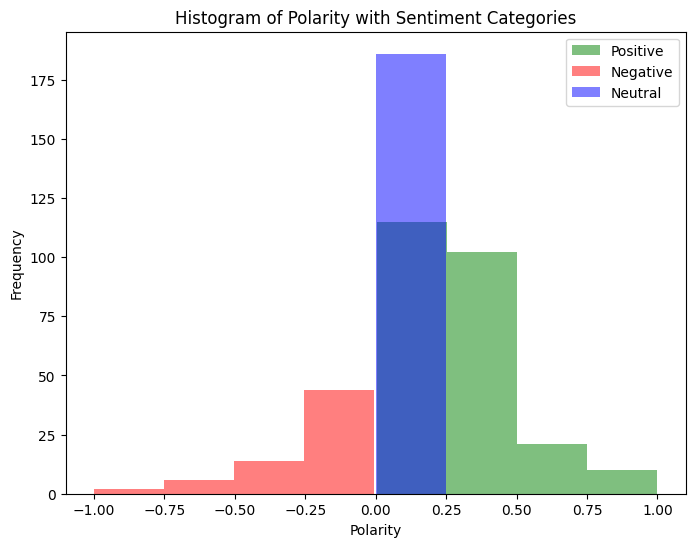

In [ ]:
import matplotlib.pyplot as plt

# Define color codes for sentiment categories
color_dict = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate through each sentiment category
for sentiment, color in color_dict.items():
    # Filter DataFrame based on sentiment category
    filtered_df = sentiment_analysis_df[sentiment_analysis_df['sentiment'] == sentiment]
    # Plot histogram for polarity values of the filtered DataFrame
    ax.hist(filtered_df['polarity'], bins=4, color=color, alpha=0.5, label=sentiment)

# Add labels and legend for clarity
ax.set_xlabel('Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Polarity with Sentiment Categories')
ax.legend()

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go

# Set colour codes for sentiment polarity categories
color_dict = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Create a scatter plot for the map using Plotly
fig = go.Figure(go.Scattermapbox(
    lat=sentiment_analysis_df['latitude'],
    lon=sentiment_analysis_df['longitude'],
    mode='markers',
    marker=dict(
        size=18,
        color=[color_dict[s] for s in sentiment_analysis_df['sentiment']],
        opacity=0.9
    ),
    text=[f'Location: {loc}<br>Sentiment: {sent}<br>Polarity: {pol:.2f}'
          for loc, sent, pol in zip(sentiment_analysis_df['user_location'],
                                    sentiment_analysis_df['sentiment'],
                                    sentiment_analysis_df['polarity'])]
))

# Customize map layout
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=0,
    mapbox_center={"lat": 0, "lon": 0},
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Show the interactive map
fig.show()

# You can simply hover around different part of the map to see more details


# Task 2.4 Subjectivity Analysis



<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> In this task, we looked at sentiment subjectivity which refers to the degree to which a tweet expresses personal opinions, emotions, or feelings, as opposed to factual information. The subjectivity score, calculated using the TextBlob library, ranges from 0 to 1, where 0 indicates the tweet is highly objective (fact-based) and 1 indicates the tweet is highly subjective (opinion-based).
     
The subjectivity categorisation function further refines this analysis by classifying the subjectivity scores into three categories: 'Low', 'Medium' and 'High'. Tweets with subjectivity scores below 0.33 are categorised as 'Low', indicating a predominantly factual or objective nature. Those with scores between 0.33 and 0.66 are labeled as 'Medium', suggesting a moderate level of subjective content. Tweets with scores above 0.66 are categorised as 'High', indicating a high degree of subjectivity, likely characterised by strong personal opinions or emotional expressions. This dual approach of subjectivity assessment and categorisation enriches the analysis, enabling an understanding of the subjective nature of the tweets and providing insights into the diversity of content within the dataset.
     
</div>


In [ ]:
# Calculate subjectivity for each processed tweet and add it to the sentiment_analysis_df DataFrame
def calculate_subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

sentiment_analysis_df['subjectivity'] = sentiment_analysis_df['processed_tweet'].apply(calculate_subjectivity)

# Group by location and calculate the average subjectivity
average_subjectivity_by_location = sentiment_analysis_df.groupby(['latitude', 'longitude'])['subjectivity'].mean().reset_index()

In [ ]:
# Define a function to categorise subjectivity values
def categorize_subjectivity(subjectivity):
    if subjectivity < 0.33:
        return "Low"
    elif subjectivity >= 0.33 and subjectivity < 0.66:
        return "Medium"
    else:
        return "High"

In [ ]:
# Apply the categorisation function to the subjectivity values and add a new column for subjectivity category
sentiment_analysis_df['subjectivity_category'] = sentiment_analysis_df['subjectivity'].apply(categorize_subjectivity)

# Display the sentiment_analysis_df DataFrame with subjectivity results
sentiment_analysis_df.head()

,user_location,processed_tweet,latitude,longitude,polarity,sentiment,subjectivity,subjectivity_category
2956,"Cork, Ireland",Seeing all the ChatGPT examples with more comp...,51.897077,-8.465467,0.228571,Positive,0.510714,Medium
3520,"California, USA",Did you try,36.701463,-118.755997,0.000000,Neutral,0.000000,Low
6336,"Thessaloniki, Greece",I was really impressed when I asked ChatGPT to...,40.640317,22.935272,0.666667,Positive,1.000000,High
8578,"New Delhi, India",Just tried OpenAI ChatGpt The future is here t...,28.643086,77.219267,-0.400000,Negative,0.641667,Medium
8052,"Austin, TX",ChatGPT casually answering my homework,30.271129,-97.743700,-0.500000,Negative,0.866667,High


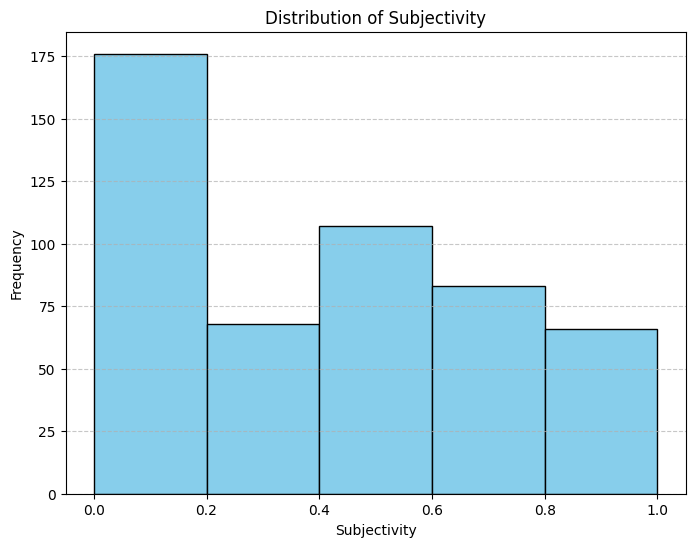

In [ ]:
# Plot histogram for subjectivity values
plt.figure(figsize=(8, 6))
plt.hist(sentiment_analysis_df['subjectivity'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], color='skyblue', edgecolor='black')
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create a scatter plot for the map using Plotly
fig = go.Figure(go.Scattermapbox(
    lat=sentiment_analysis_df['latitude'],
    lon=sentiment_analysis_df['longitude'],
    mode='markers',
    marker=dict(
        size=18,
        color=sentiment_analysis_df['subjectivity_category'].map({

            'High': 'blue',
            'Low': 'red',
            'Medium': 'yellow',


        }),
        opacity=0.9
    ),
    text=[f'Location: {loc}<br>Subjectivity Category: {sub_cat}<br>Subjectivity: {sub:.2f}'
          for loc, sub_cat, sub in zip(sentiment_analysis_df['user_location'],
                                       sentiment_analysis_df['subjectivity_category'],
                                       sentiment_analysis_df['subjectivity'])]
))

# Customize map layout
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=0,
    mapbox_center={"lat": 0, "lon": 0},
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Show the interactive map
fig.show()

# You can simply hover around different part of the map to see more details



# Task 2.5 Storify/Interpretation


The sentiment and subjectivity analysis of ChatGPT tweets unveils fascinating insights into public perceptions about ChatGPT across diverse geographical regions.

A total of 500 tweet were randomly selected and analysed. Positive sentiment dominates on a global scale, outweighing negative and neutral sentiment, indicating a prevailing favourable perception of ChatGPT. On the other hand, neutral sentiment surpasses negative sentiment across most regions, suggesting a general lack of strong negative opinions.

In North and South America, particularly the United States, a strong positive sentiment is evident, accompanied by fewer neutral and even fewer negative sentiments. Users in this region may appreciate ChatGPT's usefulness, while tech-savvy hubs like Silicon Valley in the United States, known for valuing innovation and AI development, could have also contributed to its popularity.

Europe showcases widespread positive sentiment across countries such as the UK, Germany, Ireland etc, with neutral sentiment also observed but to a lesser extent. Generally, areas with a strong presence of tech companies, schools, universities and research institutions may exhibit positive views towards ChatGPT due to its potential to enhance productivity, as it is with most countries in Europe.

Some segments in Africa exhibit neutral sentiments despite limited data compared to other regions like America and Europe. Across Asia and the Middle East, positive and neutral sentiments are nearly equal, with a scarcity of negative sentiments like in Saudi Arabia and a few others. One possible explanation for the prevalent neutral sentiment towards ChatGPT could be scepticism or concerns regarding the implications of AI technology, such as fear of job displacement or ethical considerations regarding its use in decision-making processes. Additionally, given that Africa, Asia and the Middle East are regions with diverse cultural and linguistic backgrounds, negativity towards ChatGPT may arise if perceived as insensitive or biased in its language generation.

Australia presents a mixed sentiment landscape, with positive, negative and neutral sentiments expressed, despite a smaller dataset compared to America or Europe. The availability of more tweet data in America and Europe resulted in a higher expression of sentiments compared to other regions like Africa and Australia.

Subjectivity levels vary across regions, with some demonstrating high, medium or low subjectivity. In Asia, Africa and Australia, subjectivity tends to be low, reflecting a more objective tone in tweets. Europe, on the other hand, displays varying subjectivity levels, with low subjectivity prevailing, followed by medium and fewer instances of high subjectivity. North America exhibits mixed subjectivity levels, making it challenging to identify a dominant category, with all levels of subjectivity visibly represented.

It is important to note that notable outliers were observed, where the tweet data did not precisely correspond with the locations. These outliers could come from various factors, including inaccuracies in geolocation tagging or the presence of spam or bot-generated content. Additionally, cultural and linguistic differences may lead to misinterpretations of sentiment, especially in multilingual regions where automated sentiment analysis algorithms may struggle to capture those gaps.


<strong>Implications:<strong/>
    
The widespread positive sentiment globally indicates a generally favourable perception of ChatGPT, suggesting its effectiveness and utility across diverse applications. The varying subjectivity levels in Europe and North America may reflect diverse perspectives and opinions, influencing how ChatGPT is perceived and utilised in different contexts. The dominance of positive sentiment in regions like North America and Europe underscores a strong market potential for ChatGPT-based solutions and services in these areas. Additionally, the limited negative sentiment globally suggests a relatively low level of criticism or dissatisfaction with ChatGPT, implying that ChatGPT has a good and growing reputation with huge potential for global adoption.




# THANK YOU